## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [194]:
# Standard Packages
import pandas as pd
import numpy as np
import math

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.display.max_columns = None
pd.options.display.width = None

In [195]:
# Your code here - remember to use markdown cells for comments as well!
housingRaw = pd.read_csv('data/kc_house_data.csv')
housingRaw.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,NONE,Good,8 Good,Oil,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,FAIR,Average,7 Average,Gas,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,NONE,Average,7 Average,Gas,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908
30154,9557800100,4/29/2022,500000.0,3,1.5,1200,11058,1.0,NO,NO,NO,NONE,Average,7 Average,Oil,PUBLIC,1200,0,420,0,1965,0,"18615 7th Avenue South, Burien, Washington 981...",47.435840,-122.32634


In [196]:
housingRaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [197]:
# Missing some houses heating source, and sewer system. Plan to drop them.
cleaningDF = housingRaw.dropna(subset = ['sewer_system','heat_source'], axis = 0)
cleaningDF['date'] = pd.to_datetime(cleaningDF['date'])

<ipython-input-197-a009b26462ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['date'] = pd.to_datetime(cleaningDF['date'])


In [198]:
# Waterfront, greenbelt, nuisance convert to boolean
if cleaningDF['waterfront'][0] == 'NO':
# If statement to only run code if cleaning needed
    cleaningDF['waterfront'] = cleaningDF['waterfront'].map({"YES": 1, "NO": 0})
    cleaningDF['greenbelt'] = cleaningDF['greenbelt'].map({"YES": 1, "NO": 0})
    cleaningDF['nuisance'] = cleaningDF['nuisance'].map({"YES": 1, "NO": 0})

<ipython-input-198-008fa64c390d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['waterfront'] = cleaningDF['waterfront'].map({"YES": 1, "NO": 0})
<ipython-input-198-008fa64c390d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['greenbelt'] = cleaningDF['greenbelt'].map({"YES": 1, "NO": 0})
<ipython-input-198-008fa64c390d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [199]:
condition_mapping = {'Very Good': 4, 'Good': 3, 'Average': 2, 'Fair': 1, 'Poor': 0}
if cleaningDF['condition'][0] == 'Good':
    cleaningDF['condition'] = cleaningDF['condition'].map(condition_mapping)
    cleaningDF['grade'] = cleaningDF['grade'].str.extract(r'(\d+)').astype(int)

# Standardizing Stuffs
cols_to_standardize = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio']
HousingReady_Standardized = (cleaningDF[cols_to_standardize] - cleaningDF[cols_to_standardize].mean()) / cleaningDF[cols_to_standardize].std()
housingReady = cleaningDF.assign(sqft_living = HousingReady_Standardized['sqft_living'],
                               sqft_lot = HousingReady_Standardized['sqft_lot'],
                               sqft_above = HousingReady_Standardized['sqft_above'],
                               sqft_basement = HousingReady_Standardized['sqft_basement'],
                               sqft_garage = HousingReady_Standardized['sqft_garage'],
                               sqft_patio = HousingReady_Standardized['sqft_patio'])

<ipython-input-199-7319aded9884>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['condition'] = cleaningDF['condition'].map(condition_mapping)
<ipython-input-199-7319aded9884>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaningDF['grade'] = cleaningDF['grade'].str.extract(r'(\d+)').astype(int)


In [200]:
housingReady = cleaningDF

In [201]:

housingReady.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011100e+04,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000,30111.000000
mean,4.539171e+09,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,0.016971,0.025638,0.174322,2.472286,7.653980,1810.389658,476.617117,330.475308,217.451264,1975.162299,90.792767,47.328482,-121.318872
std,2.882236e+09,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,0.129163,0.158057,0.379392,0.701960,1.144548,877.726339,579.805355,285.725020,245.301991,32.052930,416.197627,1.433309,5.724073
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.070850e+09,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,0.000000,0.000000,2.000000,7.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405348,-122.326075
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,0.000000,0.000000,0.000000,2.000000,8.000000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551440,-122.225790
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,0.000000,0.000000,0.000000,3.000000,8.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669917,-122.116394
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,1.000000,1.000000,1.000000,4.000000,13.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


## EDA

<AxesSubplot:>

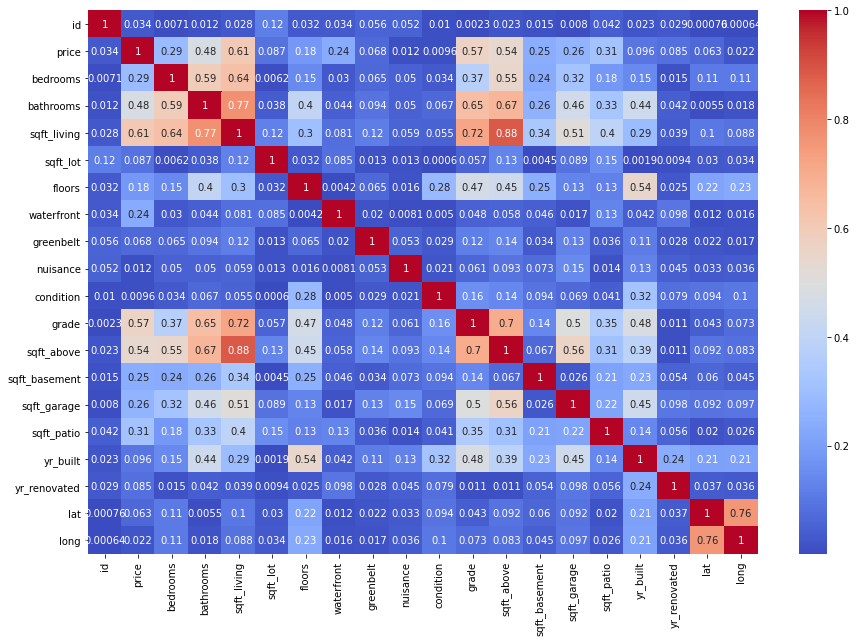

In [202]:
corr = abs(housingReady.corr())
plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

## Instantiate Baseline Model

In [203]:
# Looks Like Sqft_living is most correlated with price, which makes sense. Let's make that our baseline model
y = housingReady['price']
X = housingReady[['sqft_living']]
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# Create Baseline Model
BaselineModel = LinearRegression()
BaselineModel.fit(X_train, y_train)
intercept = BaselineModel.intercept_
coef = BaselineModel.coef_
# Print Results:
print(f"The intercept is: {intercept}")
print(f"The coefficient is: {coef[0]}")
y_pred = BaselineModel.predict(X_test)
print("R^2: ", BaselineModel.score(X_test, y_test))

The intercept is: -69251.33204540447
The coefficient is: 555.7711438275754
R^2:  0.3713105665128623


In [204]:
# Currently, our baseline model captures 37.13% of the variance in housing price.

## Feature Additions- Distance from City Center, Does it have a patio, Years since built/renovated

In [205]:
# Distance from City Center

# Instantiate Function- From ChatGPT
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine distance between two points on the Earth's surface.
    """
    R = 6371  # radius of Earth in km
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d
# Amazon headquarters GPS location (Seattle city center)
city_lat = 47.6184
city_long = -122.3560
# Use Function to Create New Column
housingReady["distance"] = haversine(city_lat, city_long, housingReady["lat"], housingReady["long"])
# Standardize Distance
housingReady['distance'] = (housingReady['distance'] - housingReady['distance'].mean()) / housingReady['distance'].std()

<ipython-input-205-673430ab9354>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingReady["distance"] = haversine(city_lat, city_long, housingReady["lat"], housingReady["long"])
<ipython-input-205-673430ab9354>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingReady['distance'] = (housingReady['distance'] - housingReady['distance'].mean()) / housingReady['distance'].std()


In [206]:
# Does it have a patio
housingReady['Patio'] = [1 if x > 0 else 0 for x in housingReady['sqft_patio']]

<ipython-input-206-bcab38bcd951>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingReady['Patio'] = [1 if x > 0 else 0 for x in housingReady['sqft_patio']]


In [207]:
# Years since updated
housingReady['yr_sold'] = housingReady['date'].dt.year
housingReady['Years_Since_Update'] = housingReady['yr_sold'] - housingReady[['yr_built', 'yr_renovated']].min(axis=1)

<ipython-input-207-8044c23b0f9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingReady['yr_sold'] = housingReady['date'].dt.year
<ipython-input-207-8044c23b0f9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingReady['Years_Since_Update'] = housingReady['yr_sold'] - housingReady[['yr_built', 'yr_renovated']].min(axis=1)


In [208]:
# View to Numerical
view_mapping = {'NONE': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}
housingReady['view'] = housingReady['view'].map(view_mapping)
housingReady['view'].unique()

<ipython-input-208-a4257c68544f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingReady['view'] = housingReady['view'].map(view_mapping)


array([1, 3, 5, 2, 4], dtype=int64)

In [209]:
# Does it have a garage
housingReady['Garage'] = [1 if x > 0 else 0 for x in housingReady['sqft_garage']]

<ipython-input-209-aa1eeba26df4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housingReady['Garage'] = [1 if x > 0 else 0 for x in housingReady['sqft_garage']]


### Explore Correlation of New Features

<AxesSubplot:>

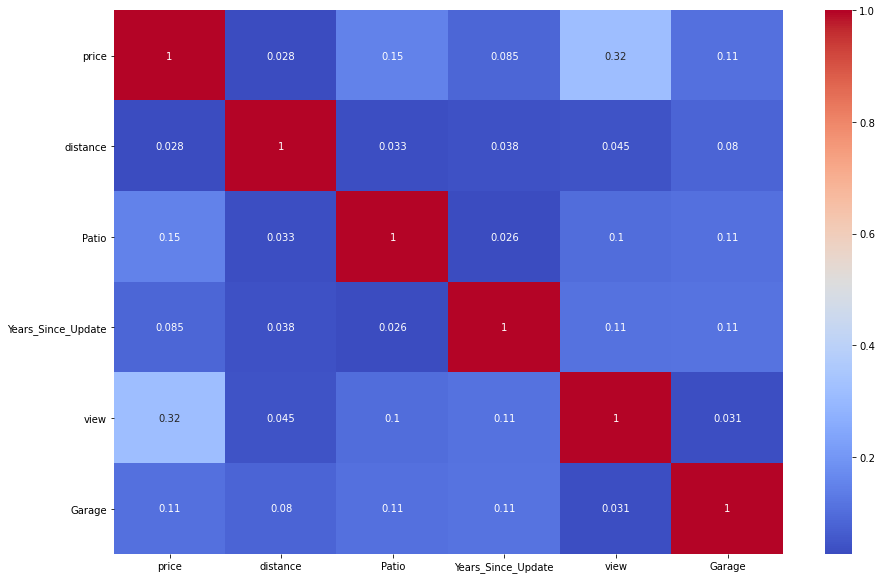

In [210]:
corrNewFeat = abs(housingReady[['price','distance','Patio','Years_Since_Update','view','Garage']].corr())
plt.subplots(figsize=(15,10))
sns.heatmap(corrNewFeat, annot = True, cmap = 'coolwarm')

Interesting, it seems that Patio has the strongest correlation with price, followed by Years_Since_Update, and Distance

### Second Model, let's add Patio as the new feature

In [211]:
y = housingReady['price']
X = housingReady[['sqft_living','Patio']]
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# Create Baseline Model
SecondModel = LinearRegression()
SecondModel.fit(X_train, y_train)
intercept = SecondModel.intercept_
coef = SecondModel.coef_
# Print Results:
print(f"The intercept is: {intercept}")
print(f"The coefficient is: {coef[0]}")
y_pred = SecondModel.predict(X_test)
print("R^2: ", SecondModel.score(X_test, y_test))

The intercept is: -52738.56169853802
The coefficient is: 559.4534943432782
R^2:  0.37151957368341426


With the addition of our new feature, Patio, we are now capturing 37.15% of the variance in price

### Third Model: Let's add Years_Since_Update

In [212]:
y = housingReady['price']
X = housingReady[['sqft_living','Patio','Years_Since_Update']]
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# Create Baseline Model
ThirdModel = LinearRegression()
ThirdModel.fit(X_train, y_train)
intercept = ThirdModel.intercept_
coef = ThirdModel.coef_
# Print Results:
print(f"The intercept is: {intercept}")
print(f"The coefficient is: {coef[0]}")
y_pred = ThirdModel.predict(X_test)
print("R^2: ", ThirdModel.score(X_test, y_test))

The intercept is: 192270.65268353035
The coefficient is: 557.7821175883406
R^2:  0.37692197670786576


When we add the years since update or creation to our model, we are now capturing 37.69% of variance in price

### Fourth Model: Let's add distance from Amazon to our model

In [213]:
y = housingReady['price']
X = housingReady[['sqft_living','Patio','Years_Since_Update','distance']]
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# Create Baseline Model
FourthModel = LinearRegression()
FourthModel.fit(X_train, y_train)
intercept = FourthModel.intercept_
coef = FourthModel.coef_
# Print Results:
print(f"The intercept is: {intercept}")
print(f"The coefficient is: {coef[0]}")
y_pred = FourthModel.predict(X_test)
print("R^2: ", FourthModel.score(X_test, y_test))

The intercept is: 193381.15676297084
The coefficient is: 561.2179487136873
R^2:  0.37857205499801927


When we add the years since update or creation to our model, we are now capturing 37.86% of variance in price

#### From our original dataframe, it looks like the Grade column had a pretty strong correlation with price. Let's add that to our model as well.

#### Model 5: Adding Grade

In [214]:
y = housingReady['price']
X = housingReady[['sqft_living','Patio','Years_Since_Update','distance','grade']]
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# Create Baseline Model
FifthModel = LinearRegression()
FifthModel.fit(X_train, y_train)
intercept = FifthModel.intercept_
coef = FifthModel.coef_
# Print Results:
print(f"The intercept is: {intercept}")
print(f"The coefficient is: {coef[0]}")
y_pred = FifthModel.predict(X_test)
print("R^2: ", FifthModel.score(X_test, y_test))

The intercept is: -990621.8116475488
The coefficient is: 376.7444208177472
R^2:  0.41222514030790636


When we add the grade of the house  to our model, we are now capturing 41.22% of variance in price

### Drop Columns with Multicolinearity

In [215]:
housingReady.shape

(30111, 30)

In [216]:
if housingReady.shape[1] == 30:
    housingReady.drop(['bathrooms', 'bedrooms','floors'], axis=1, inplace=True)
    housingReady.drop(['sqft_above', 'sqft_basement','sqft_lot','sqft_patio','sqft_garage'], axis=1, inplace=True)
    housingReady.drop(['date', 'yr_sold', 'yr_built', 'yr_renovated'], axis=1, inplace=True)

c:\Users\cnade\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [217]:
housingReady.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  30111 non-null  int64  
 1   price               30111 non-null  float64
 2   sqft_living         30111 non-null  int64  
 3   waterfront          30111 non-null  int64  
 4   greenbelt           30111 non-null  int64  
 5   nuisance            30111 non-null  int64  
 6   view                30111 non-null  int64  
 7   condition           30111 non-null  int64  
 8   grade               30111 non-null  int32  
 9   heat_source         30111 non-null  object 
 10  sewer_system        30111 non-null  object 
 11  address             30111 non-null  object 
 12  lat                 30111 non-null  float64
 13  long                30111 non-null  float64
 14  distance            30111 non-null  float64
 15  Patio               30111 non-null  int64  
 16  Year

In [218]:
# Let's also drop columns we don't care about
housingReady.drop(['id','sewer_system','lat','long','address'],axis = 1, inplace = True)

<AxesSubplot:>

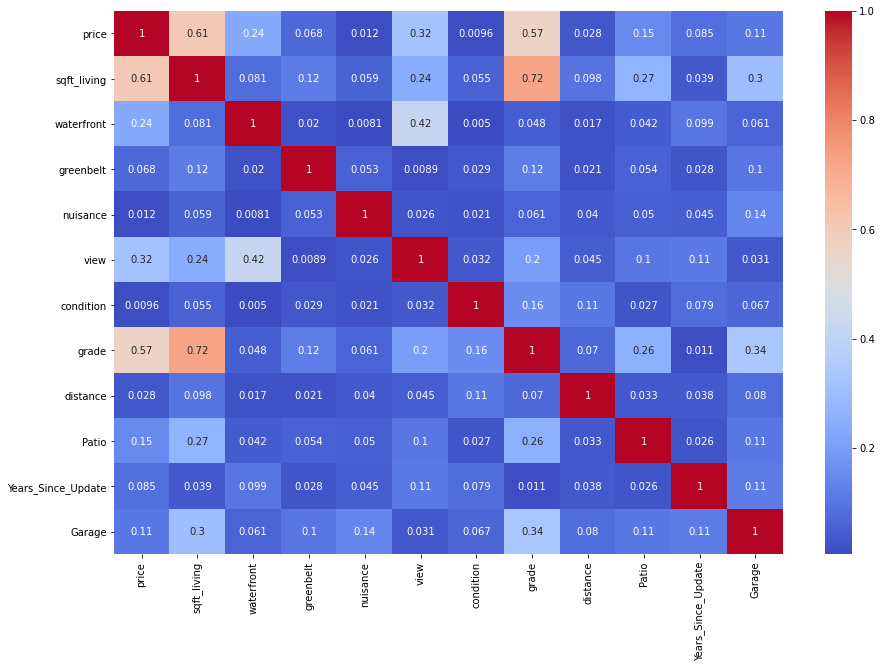

In [222]:
plt.subplots(figsize=(15,10))
sns.heatmap(abs(housingReady.corr()), annot = True, cmap = 'coolwarm')

#### Model 6: Adding Garage

In [223]:
y = housingReady['price']
X = housingReady[['sqft_living','Patio','Years_Since_Update','distance','grade','Garage']]
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
# Create Model
Model6 = LinearRegression()
Model6.fit(X_train, y_train)
intercept = Model6.intercept_
coef = Model6.coef_
# Print Results:
print(f"The intercept is: {intercept}")
print(f"The coefficient is: {coef[0]}")
y_pred = Model6.predict(X_test)
print("R^2: ", Model6.score(X_test, y_test))

The intercept is: -1113853.7416029403
The coefficient is: 387.6518752564307
R^2:  0.4218274386818577
